# GitHub Actions Overview

* **GitHub Actions allows you to treat your CI pipeline as code**.
* Unlike other tools, all you need is a `.yaml` file **to store the workflow definitions in a folder called `.github/workflows`**. It doesn't matter what name you give these YAML files because each file describes when they should be triggered.
* GitHub Actions processes all the files in the **workflows** folder but executes them only when the workflow’s specified event happens.
* Similar to **Jenkins with its rich collection of plugins**, **GitHub Action has a marketplace that hosts actions** that you can use in your workflows. You can choose from a large variety of actions for almost any language and step that you need to perform.
* Before writing a script to perform some action, I always check the marketplace to see if somebody has already created an action for it, and most of the time, someone has.

# GitHub Actions setup

* One of the nice features of GitHub Actions is that, unlike many of its competitors like Jenkins, Circle CI, and Travis CI, **there's no website to manually set up anything**.
* All you need is to create a workflows folder and add the YAML files that represent your workflow.
* No other configuration is needed.
* This makes it not only simple to get started but ensures that your CI/CD workflows are reproducible because there’s **no manual steps involved**.
* Lastly, starter code is available to get you up and running quickly.

From the **Actions** tab in your GitHub repo, you can **select from the functional workflow templates** and **edit them** for your situation.

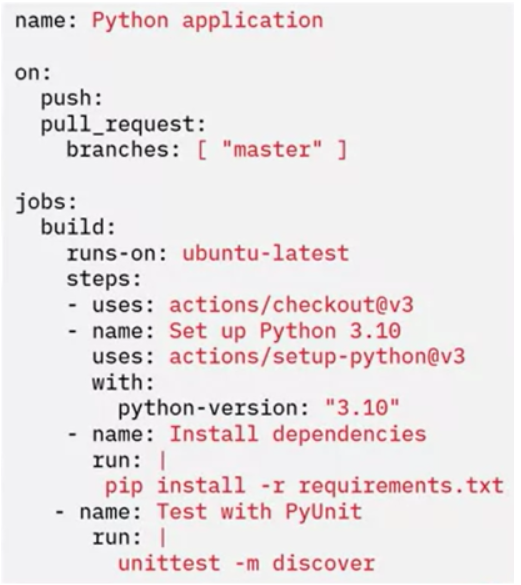

# Basic Concepts

* The basic concept in GitHub Actions is a **workflow**.
* A **workflow** is a series of automated procedures represented as **jobs** and **steps** that GitHub Actions executes.
* Every repository can have any number of workflows.
    * You could have a workflow for Continuous Integration,
    * another workflow for Continuous Delivery, and
    * another workflow that publishes artifacts.
* You place whatever number of workflows you need in the **`workflows`** folder.

# Workflow Components

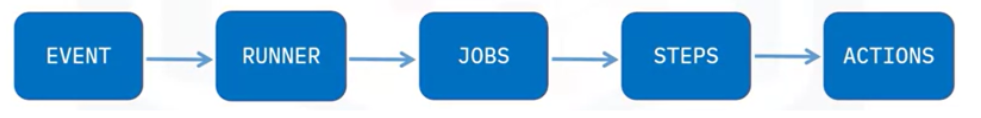

**Each workflow has the following components:** 
* It has an **event** that tells it when the workflow should run.
* **Events** could be things like:
    * when you push to a repo,
    * create a pull request, or
    * create a release, just to name a few.
* Workflows use **runners** to execute the jobs.
    * There are built-in runners for different virtual environments, or
    * You can use a self-hosted runner in your environment.
* **A workflow contains one or more jobs**.
    * You can have one job that builds your component
    * and another job that publishes it to an artifact repository,
    * and still another job that deploys it to an environment.
* **Each job can contain one or more steps**.
    * One step can check out the code,
    * another step might compile the code,
    * yet another step might run a linter on the code.
    * you'll probably have a step that runs a suite of test cases to make sure that the code works properly.
* **Each step can contain one or more actions or shell commands**.
    * **Actions are the lowest level of a workflow**.
    * They perform a single task like check out code, install dependencies, compile code, or run tests.

This hierarchy of jobs, steps, and actions allows you to logically group the actions performed by your workflow.

# How does GitHub Actions work?

Let's look at **how GitHub Actions works**.
* You create a folder called **`‘.github/workflows’`** in the root of your project.
* You may already have a **`‘.github’`** folder to hold your issue templates.
* If so, just create a **`‘workflows’`** folder under that one.
* Next, in that folder, you place at least one **`.yaml`** file that contains the statements for your workflow.
* You can have one or more workflows specified as **`.yaml`** files.
* Then, depending on how you configured it, your workflow will execute when the specified event happens.
* For example, 
    * when you push to the master branch, a build may execute, or 
    * when you issue a pull request, a test may run.
* The job runs in an isolated environment, either on a virtual machine or in a Docker container.

# Initial Setup

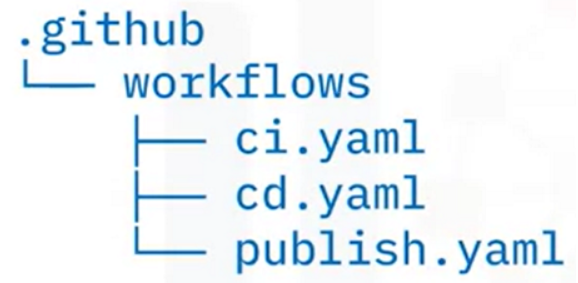

To set up using GitHub Actions, 
* You first create a **`‘.github’`** folder (if you don’t already have one).
* Then, under that folder, you create a **`‘workflows’`** folder to hold all of your **GitHub workflows**.
* Finally, you place the **`.yaml`** files representing your various workflows into the **`‘workflows’`** folder.
* That's all the configuration you need.

# Workflow composition

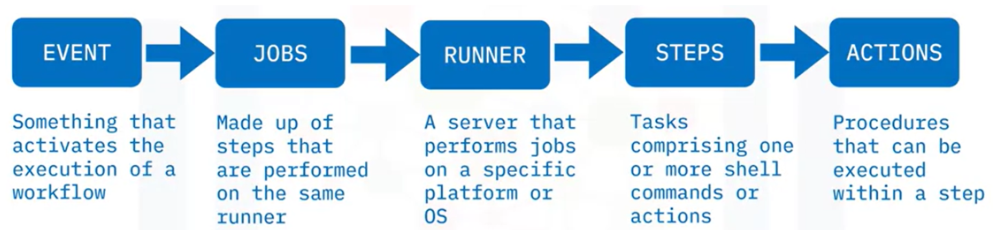

**Each workflow contains the following components:**
* An **event** is something that activates the execution of a workflow.
    * There are many events to choose from, the most common being:
        * checking code into a repository,
        * or pushing code to a branch,
        * or making a pull request.
* Next, you have **jobs**.
    * **Jobs** are made up of **steps** that are performed on the same runner.
    * **`If a workflow has more than one job, those jobs are executed in parallel by default`**.
    * But you can configure them to declare that one is dependent on another, in which case the jobs will be executed serially based on their dependencies.
* Every job has a **runner**, which is a server that performs jobs on a specific platform or operating system.
    * GitHub can host runners, or you can host your own runners on a standalone server.
    * There's also a way **to execute steps in a Docker container**, but the **Docker container is executing on a runner**.
* **Jobs** contain **steps**, which are tasks comprising **one or more shell commands or actions**.
    * Because all the steps of a job are executed on the same runner, they can share data with one another.
    * That means:
        * you can have a **step** that checks out your code,
        * another **step** that compiles your code,
        * and yet another **step** that may build a Docker container,
        * and all of them share the same code that was checked out in the first step.
* Finally, there are **actions**, which are procedures that can be executed within a step.
    * GitHub offers numerous actions through the GitHub community and in the GitHub Actions Marketplace.
    * As you would expect, common tasks like checking out your code and uploading artifacts are already available, waiting to be used in your workflows.
    * Always check to see if an action exists in the marketplace before you create one or use shell commands.

Now let's look at the first two of these workflow components in greater detail.

We'll start with events.

# Event

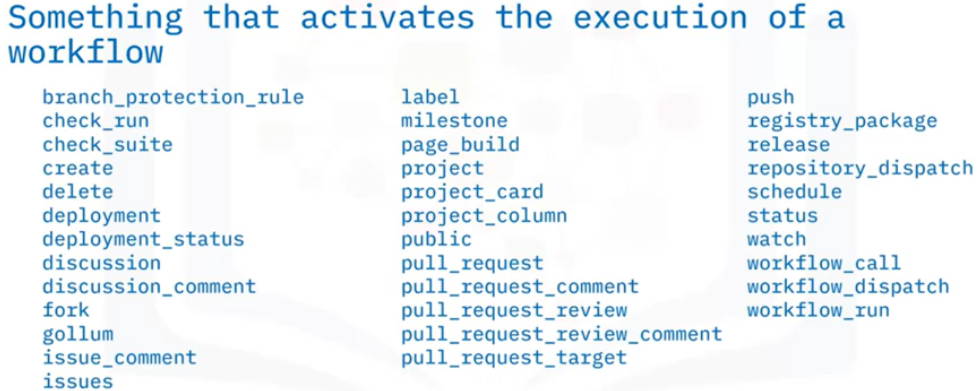

* Remember, an event is something that activates the execution of a workflow.
* There are currently 35 different events that can trigger workflow.
* As you can see from this list, whenever you modify an issue, a label, or a milestone, or you fork a repo, it can trigger an event.
* Probably the most popular events that you will use in your workflows are performing pull requests, pushing code to a branch, or creating a new release.

**Example 1:**

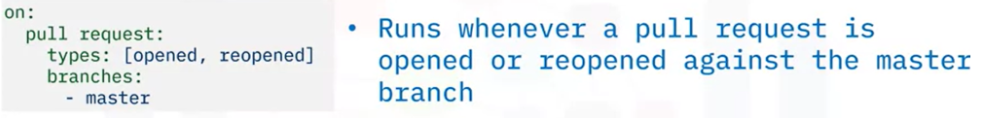

Here’s an example of **an event that runs whenever a pull request is `opened` or `reopened` against the `master` branch**.
* This is great for triggering your **CI pipeline**.
* All events start with the keyword **`on:`** followed by the keyword of the event, in this case, **`pull request`**. 
* Then some events have **`types`**. 
    * In this example, this event is listening for types, such as when a **`pull request`** is `opened` or `reopened`.
* Another input to the pull request event is a list of **`branches`** to monitor.
* This example designates the `master` branch as the target.
  
**Example 2:**

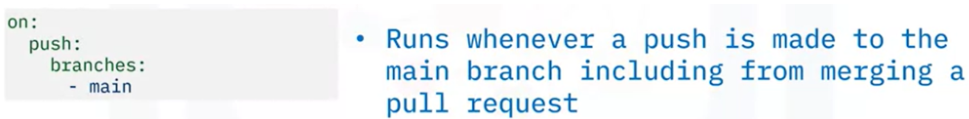

This next example **runs whenever a `push` is made to the `main` branch, including from `merging a pull request`**.
* This might be good for triggering a **CD pipeline**.
* Again, it starts with the **`on:`** keyword, followed by the keyword of the event, which in this case is **`push`**. 
* Then the list of **`branches`** follows, which in this example only contains the `main` branch, but it could have contained more.

**Example 3:**

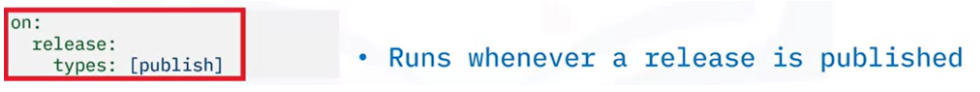

The last example will **run whenever a release is published, although it could have specified other types like when a release is created**.
* This type of event is great for triggering **a packaging workflow**.
* For example,
    * You might want to package your Python code and publish it to PyPI.
    * Or you might want to take your Java code and publish it to Maven.
    * Or you might want to build a Docker container and publish it to Docker Hub.
* Whatever activity you want to automate when creating a release, this event will help you get the job done.

# Jobs

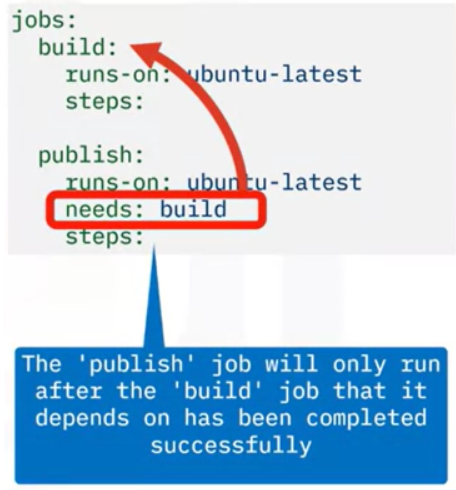

Next, you have **jobs**.
* A **job** is a **set of steps** that use the **same runner** for execution.
* Each workflow can have multiple jobs, so you are not limited to having just one job per workflow.
* This gives you a lot of flexibility when composing jobs and workflows.
* Jobs can be named whatever you want as long as they are in proper `.yaml` syntax.
* In this example,
    * there's a job called **`build`** and
    * a job called **`publish`**. 
* By default, jobs run in parallel unless you specify dependencies between them using the **`needs`** keyword.
* In this example, the **`publish`** job uses the **`needs`** keyword to specify that it is dependent on the **`build`** job.
* This tells GitHub Actions to run the **`build`** job first.
* The **`publish`** job will not run until the **`build`** job, which it depends on, has been completed successfully.
* Each job contains:
    * a **runner**,
    * optional required **services**,
    * and a **series of steps** to execute.

# Runners

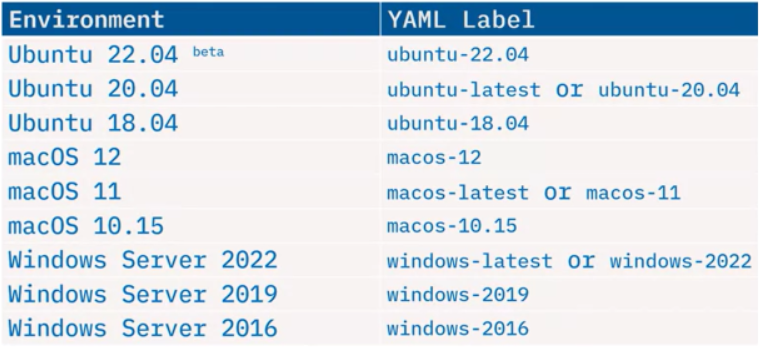

* A **runner** is a server that performs a job on a specific platform or operating system.
* In this list, you can see all the operating systems that **GitHub Actions** supports.
* There are several flavors of `Ubuntu`, `macOS`, and `Windows Server`.
* Once you specify a runner for a job, all of the steps will be executed on that runner.

**Examples:**

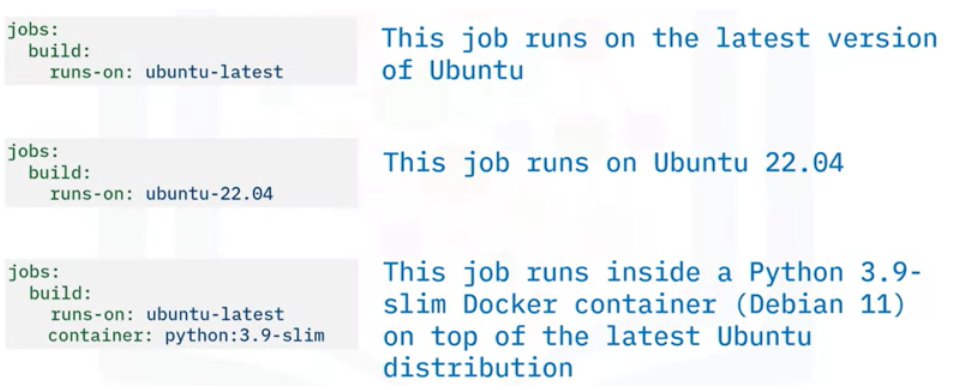

Here are some examples of **runner** definitions.

* To specify a runner, you use the **`runs-on:`** keyword.
* This **first job** is called **`build`** and it runs on whatever the latest version of Ubuntu is.
* This **next job** is very similar, but it specifies `Ubuntu 22.04`, so this job always runs on the `22.04` version of `Ubuntu` regardless of the latest version.
* This **last job** runs inside of a `Python 3.9-slim` **Docker container**, which is actually `Debian 11` inside.
* The container runs on top of the latest `Ubuntu` environment.
* So, for this one, you get a virtual machine running the latest `Ubuntu` version that instantiates a Docker container from the `Python 3.9-slim` image to run all of your steps.
* I use this one a lot because I develop in containers, and this allows me to run my build in the same containers to minimize surprises.

# Services

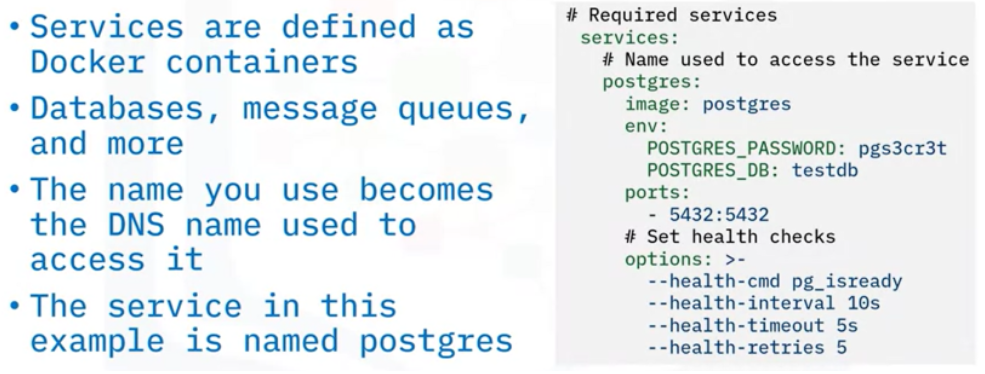

* **Jobs** can also optionally define required services for the workflow.
* **Services** are defined as **Docker containers**.
* You could use any public Docker image you'd like to create the service, including your own.
* You can create **databases**, **message queues**, or services your workflow needs.
* This example creates a **Postgres** database that is required before running some unit tests.
* Whatever name you use for the service becomes the DNS name that you use to access it.
* So, in this example, you would look for your **Postgres database** on a host called **postgres**.
* Using services like this allows you to specify the same Docker containers that you use in development for use in your workflows.

# Steps

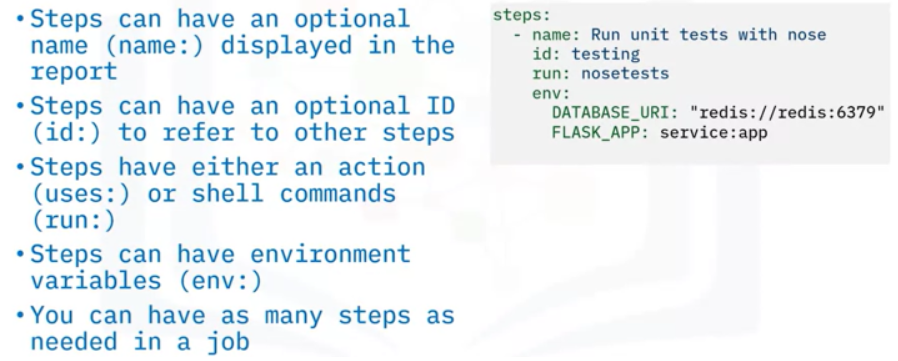

* **Steps** are at the heart of GitHub Actions.
* This is where all the work happens.
* A **step** is a task comprising one or more shell commands or actions.
* **Steps** can have an optional name specified by the **`name:`** keyword that displays in the report.
* It’s best to name your steps something descriptive so that when you look at the report, you know exactly what's going on in each step.
* If you don’t name your step yourself, the name assumes the name of the command that you're running.
* **Steps** can have an optional ID specified by the **`id:`** keyword, making it really helpful to refer to them in other steps.
* This is useful when you want to use the **output of one step as the input parameters for another step**.
* **Steps** have either an action specified by the **`uses:`** keyword or shell commands specified by the **`run:`** keyword.
* You can specify more than one shell command by **starting with a `vertical bar`** and then **placing each command on a new line**.
* Steps can also have defined **environment variables**.
* In true **12-factor** fashion, you should be **configuring your services through environment variables**, and the **`env:`** keyword allows you to do this.
* You can have as many steps as you need in a job.

# Actions

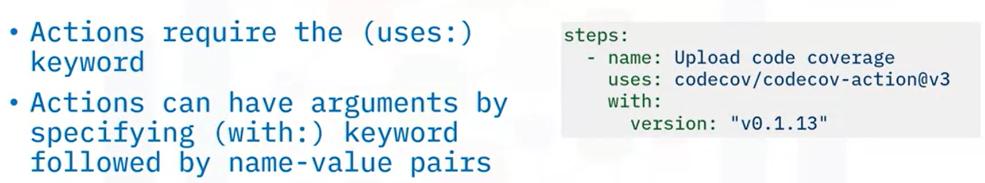

* **Actions** are procedures that can be executed within a **step**.
* Defining actions requires the **`uses:`** keyword followed by the name of the action.
* There is a large library of actions in the GitHub Actions Marketplace community.
* Actions can have arguments to configure them by specifying the **`with:`** keyword followed by `name-value` pairs.
* Some actions use the **`args:`** keyword.
* In this example, the **`codecov`** action accepts a version as one of its optional parameters.
* It’s critical that you **read the actions documentation to explore all possible options that you can configure an action with**.
* This is one time that reading the documentation really helps you.

# Workflow example

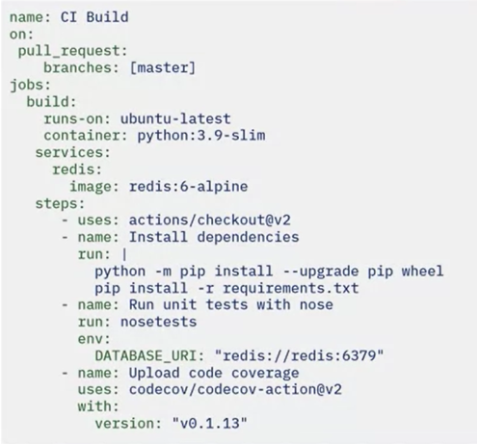

Let's put everything together with an example.
* Every workflow has a name.
* This one is called **‘CI Build’** because it's part of a **Continuous Integration workflow**.
* It’s triggered on a **pull request** to the `master` branch.
* It has a **job** called **`build`** that runs in a `Python 3.9 container` on top of the latest `Ubuntu` runner.
* It **creates a database service** called **`redis`** from the `Redis 6-Alpine` Docker image.
* Then in the **`steps:`**
    * It checks out the code using a GitHub action.
    * It uses a shell command to **upgrade `pip` and `wheel`**.
    * Then uses `pip` to `install` all of the packages in the **`requirements.txt`** file.
    * Then it runs the unit tests using a popular **Python test runner** called **`nosetests`**.
    * In the same step, it establishes an **environment variable** called **`DATABASE_URI`** that points to the `redis` database service that it created earlier.
    * Finally, it uploads code coverage data to the **Codecov website** using version `0.1.13` of a `codecov` uploader by specifying the version number as an argument.

Hopefully, this shows you how to put **events**, **jobs**, **runners**, **services**, **steps**, and **actions** together to build a **Continuous Integration workflow** that will **trigger on every pull request to the `master` branch**.